In [1]:
%matplotlib inline

# 窓関数
FIRフィルタ設計では、まず所望の周波数応答を逆フーリエ変換し、インパルス応答を求める。  

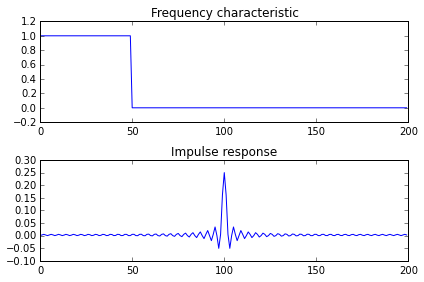

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fftpack

if __name__ == "__main__":
    #周波数特性
    t = range(200)
    fr = [1 if abs(x)<50 else 0 for x in t]
    plt.subplot(2,1,1)
    plt.title("Frequency characteristic")
    plt.ylim(-0.2, 1.2)
    plt.plot(t,fr)
    
    #周波数応答を逆フーリエ変換してインパルス応答を求める
    ir = fftpack.ifft(fr)
    ir = fftpack.fftshift(ir)  #ゼロが中心周波数になるようシフト
    plt.subplot(2,1,2)
    plt.title("Impulse response")
    plt.plot(t,ir)
    
    plt.tight_layout()

ここで得られたインパルス応答は無限の長さを持っているためそのままではフィルタとしては実現できない。  
そこで、インパルス応答を有限長に丸める。

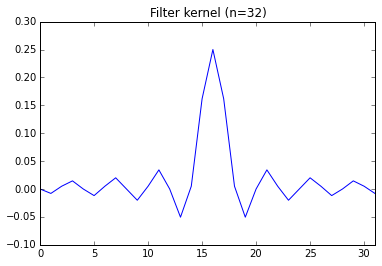

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fftpack

if __name__ == "__main__":
    #周波数特性
    t = range(200)
    fr = [1 if abs(x)<50 else 0 for x in t]
    
    #周波数応答を逆フーリエ変換してインパルス応答を求める
    ir = fftpack.ifft(fr)
    ir = fftpack.fftshift(ir)  #ゼロが中心周波数になるようシフト
    #有限長に丸める
    fk = ir[(len(ir)/2-16):(len(ir)/2+16)]
    x = range(32)
    plt.title("Filter kernel (n=32)")
    plt.xlim(x[0], x[len(x)-1])
    plt.plot(x, fk)
    

この有限長のインパルス応答をフィルタカーネルとして使用すれば、有限の計算資源しか持たないコンピュータでもデジタルフィルタを実現出来る。  
しかし、インパルス応答がゼロに収束する前に打ち切ることでカーネルの境界部分で不連続が生じている。  
時間領域で不連続が生じると、周波数領域で高周波成分、要するにリップルが発生する。  

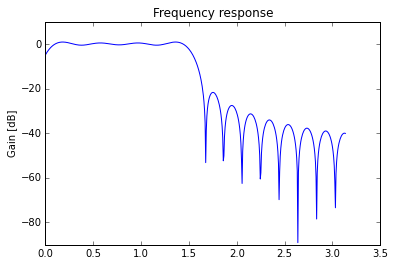

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fftpack

if __name__ == "__main__":
    #周波数特性
    t = range(200)
    fr = [1 if abs(x)<50 else 0 for x in t]
    
    #周波数応答を逆フーリエ変換してインパルス応答を求める
    ir = fftpack.ifft(fr)
    ir = fftpack.fftshift(ir)  #ゼロが中心周波数になるようシフト
    
    #有限長に丸める
    fk = ir[(len(ir)/2-16):(len(ir)/2+16)]
    x = range(32)
    
    #周波数応答を求める
    w,h = signal.freqz(fk)
    plt.title("Frequency response")
    plt.ylabel("Gain [dB]")
    plt.plot(w, 20*np.log10(h))
    

フィルタカーネル作成時にインパルス応答を何も考えず有限長で打ち切るとフィルタのリップル特性に大きな影響を及ぼす。  
このようなリップル特性の悪化を抑えるために使用されるのが__窓関数__である。

[参考文献]
+ [The Scientist and Engineer's Guide to Digital Signal Processing Ch.16 Windowed-Sinc Filter](http://www.dspguide.com/CH16.PDF)  
+ [やる夫で学ぶデジタル信号処理 16. デジタルフィルタの設計](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/dfdesign.html#SECTION001820000000000000000)